In [150]:
import numpy as np
from IPython import display
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import geopandas as gpd
import esda
import libpysal as ps
from matplotlib.patches import Ellipse
from scipy.stats import chi2, t

In [151]:
#Load Data
OpenRocketData = pd.read_csv('WeatherSimsDataSet-5_21 - Sheet1.csv')

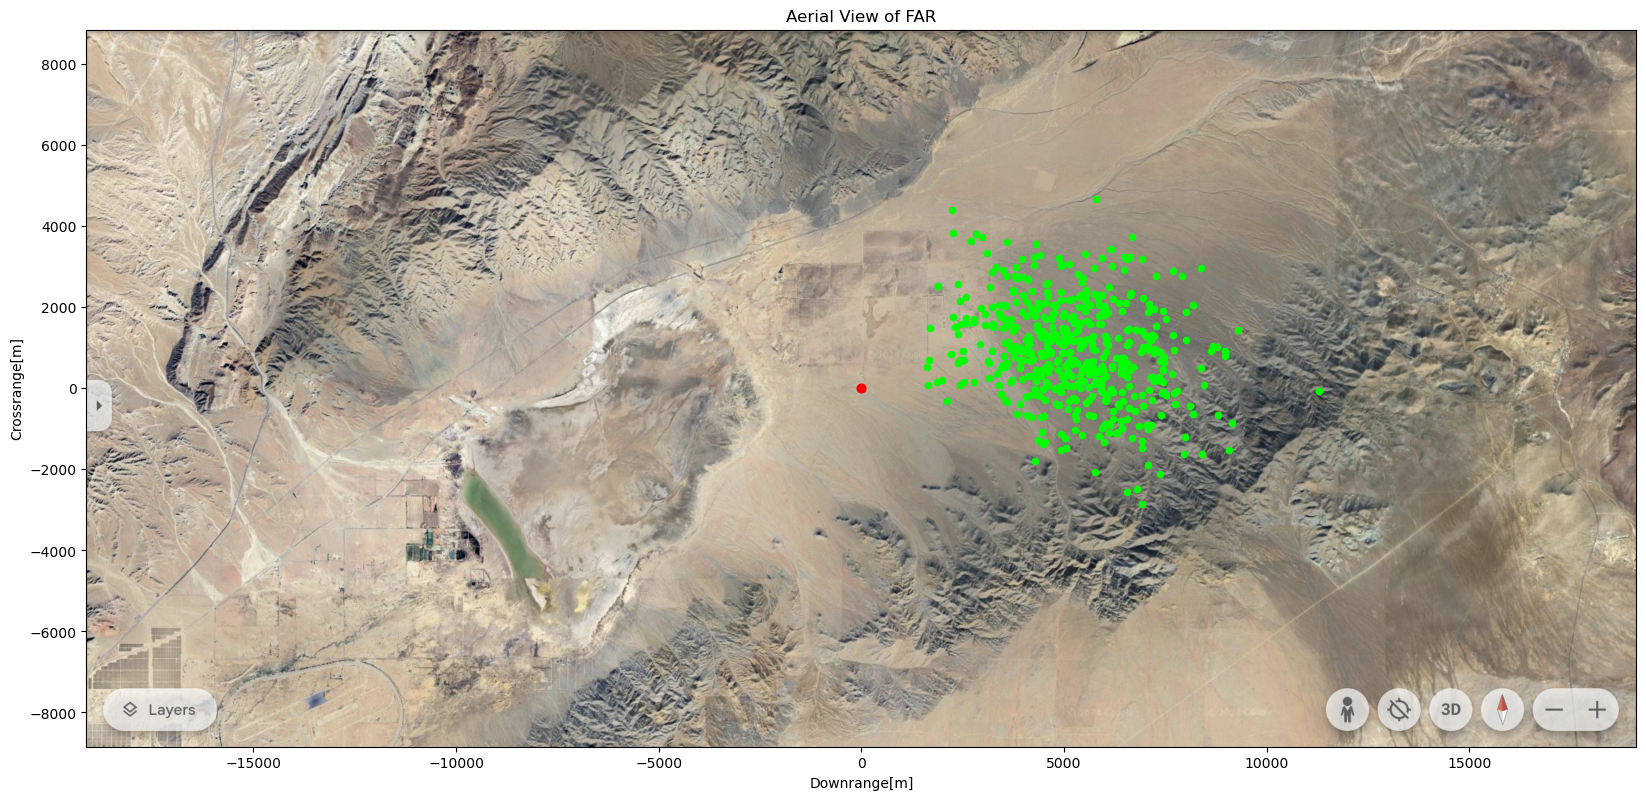

In [152]:
img = mpimg.imread('FAR_33KM.png') #10 km Camera view

#these lengths came from measuring image in google earth

xLength = 38.24*1000 #length of image, in m
yLength = 17.692*1000

# cx = xLength/2
# cy = yLength/2

parachute = True
if parachute:
    x = OpenRocketData['posEast']
    y = OpenRocketData['posNorth']
else:
    x = OpenRocketBallisticData['posEast']
    y = OpenRocketBallisticData['posNorth']


fig = plt.figure(figsize=(20, 10))


plt.imshow(img, extent=(-xLength/2,xLength/2,-yLength/2,yLength/2))

plt.scatter(x,y , c='lime', s=20) #Far launch site
plt.scatter(0,0 , c='red', s=40) #Far launch site

plt.xlabel('Downrange[m]') #adjust coordinates
plt.ylabel('Crossrange[m]') #adjust coordinates
plt.title("Aerial View of FAR")


#E2 
# plt.scatter(-2800,1400 , c='green', s=40) #Far launch site
# E2_x, E2_y =-2250.982,	1531.188 #Launch rail angle, 4 degrees north. Speed = 6 m/s, Dir = 247.5
# E2x_2, E2_y2 = -2224.424,	-910.051 #Launch rail angle, 0 degrees north. Speed = 6 m/s, Dir = 247.5
# plt.scatter(E2_x,E2_y , c='purple', s=40) 
# plt.scatter(E2x_2,E2_y2 , c='yellow', s=40) #Far launch site


# plt.grid(visible = True)


plt.show()

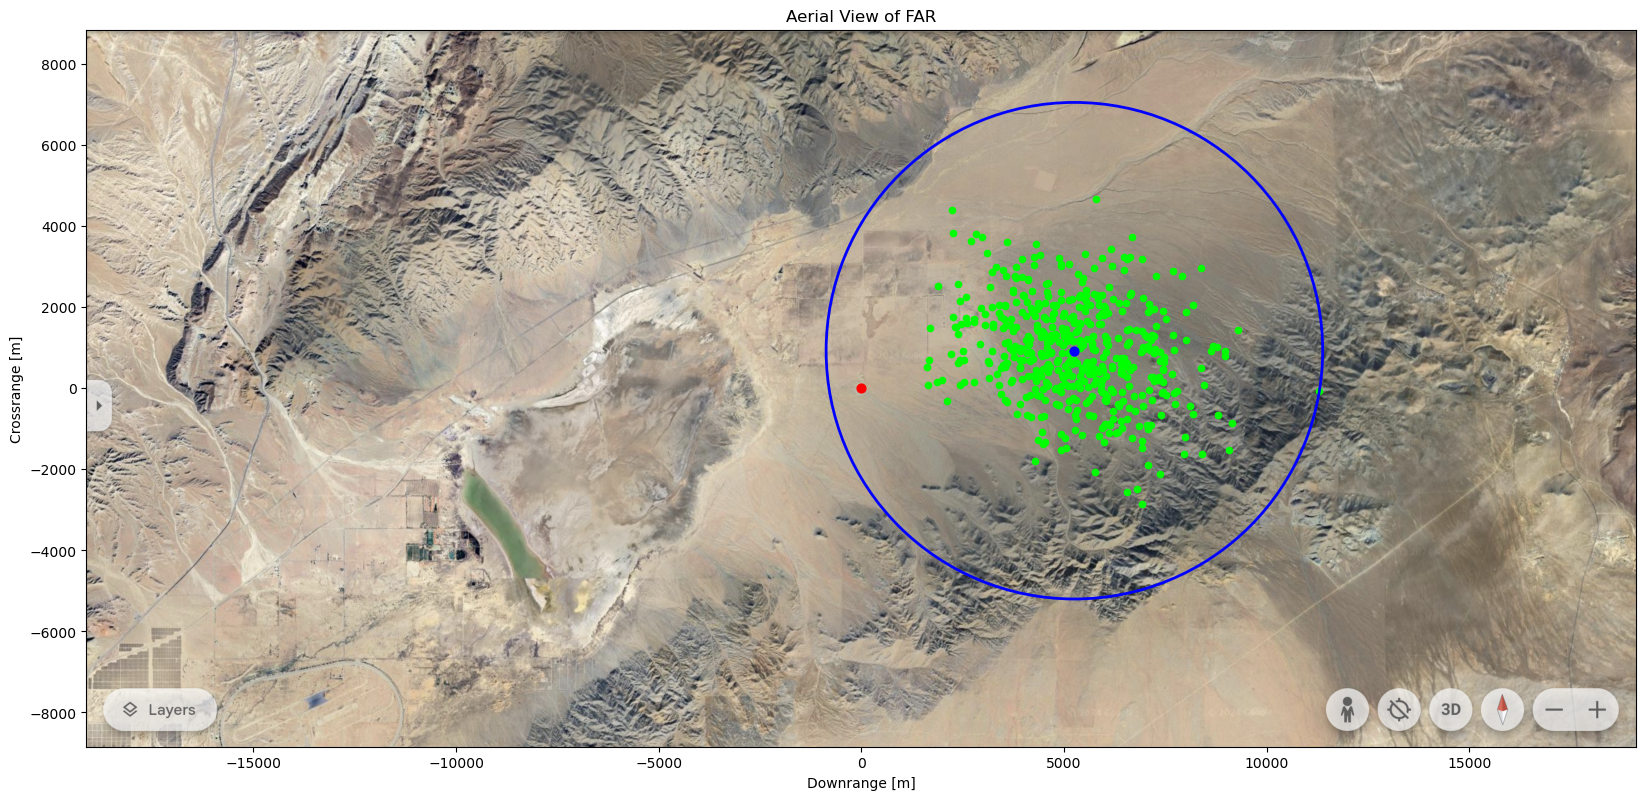

In [153]:
#circle for points

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Circle
import numpy as np

img = mpimg.imread('FAR_33KM.png')
xLength = 38.24 * 1000  # length of image, in m
yLength = 17.692 * 1000

parachute = True
if parachute:
    x = OpenRocketData['posEast']
    y = OpenRocketData['posNorth']
else:
    x = OpenRocketBallisticData['posEast']
    y = OpenRocketBallisticData['posNorth']

fig, ax = plt.subplots(figsize=(20, 10))

ax.imshow(img, extent=(-xLength/2, xLength/2, -yLength/2, yLength/2))

# Plotting the points
ax.scatter(x, y, c='lime', s=20)  # Far launch site
ax.scatter(0, 0, c='red', s=40)  # Center point

# Calculate centroid ie center of the points
centroid_x = np.mean(x)
centroid_y = np.mean(y)
ax.scatter(centroid_x, centroid_y, c='blue', s=40, zorder=5)  # Centroid dot

# Calculate the radius for the encompassing circle
radius = np.max(np.sqrt((x - centroid_x)**2 + (y - centroid_y)**2))

circle = Circle((centroid_x, centroid_y), radius, color='blue', fill=False, lw=2, zorder=4)
ax.add_patch(circle)
ax.set_xlabel('Downrange [m]')
ax.set_ylabel('Crossrange [m]')
ax.set_title("Aerial View of FAR")

plt.show()

Open rocket sample data average and SD
3.7247755767176343
2.519194061539122
empirical data average and SD
3.783622577134177
2.562816907722947


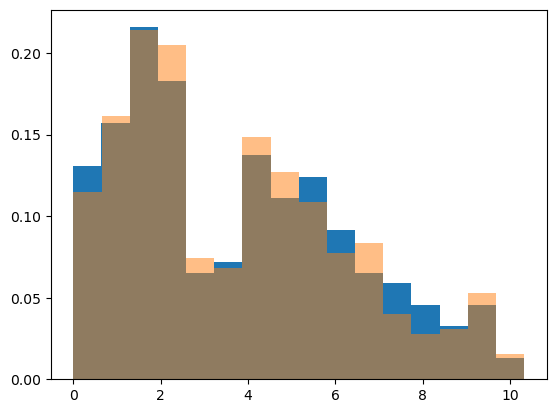

In [154]:
#Validation of wind speed
originalSpeedData = pd.read_csv("Far March Weather.csv")


conversion = 0.44704 #mph to meter per second
plt.hist( x = originalSpeedData['wind avg mph']*conversion, bins = 16, density = True) #empircal data
plt.hist(data= OpenRocketData, x = 'Avg windspeed', bins = 16, density = True, alpha = 0.5)

# originalSpeedData['wind avg']*conversion

print('Open rocket sample data average and SD')
print(np.mean(OpenRocketData['Avg windspeed']))
print(np.std(OpenRocketData['Avg windspeed']))

print('empirical data average and SD')
print( np.mean(originalSpeedData['wind avg mph']*conversion))
print( np.std(originalSpeedData['wind avg mph']*conversion))

In [155]:
#Important Data Points on Landing Sites

# avg_dist = np.sqrt(x**2+y**2)
mean_center_point = (centroid_x, centroid_y)

#Added columns for distances from launch site and mean landing distance 
OpenRocketData['distance_to_launch'] = np.sqrt((OpenRocketData['posEast'])**2 + (OpenRocketData['posNorth'])**2)
OpenRocketData['distance_to_mean'] = np.sqrt((OpenRocketData['posEast'] - centroid_x)**2 + (OpenRocketData['posNorth'] - centroid_y)**2)

launchSTD = np.std(OpenRocketData['distance_to_launch'])
meanCenterSTD = np.std(OpenRocketData['distance_to_mean'])

# print("Average Distance from Center:\n", avg_dist)
print("Center (Mean) Point:", mean_center_point)
print("Standard Dev for distance from landing sites and launch site: ", launchSTD)
print("Standard Dev for distance from landing sites and mean landing site: ", meanCenterSTD)

Center (Mean) Point: (5254.898504714, 924.0642025017358)
Standard Dev for distance from landing sites and launch site:  1467.2476153681414
Standard Dev for distance from landing sites and mean landing site:  923.8516389048254


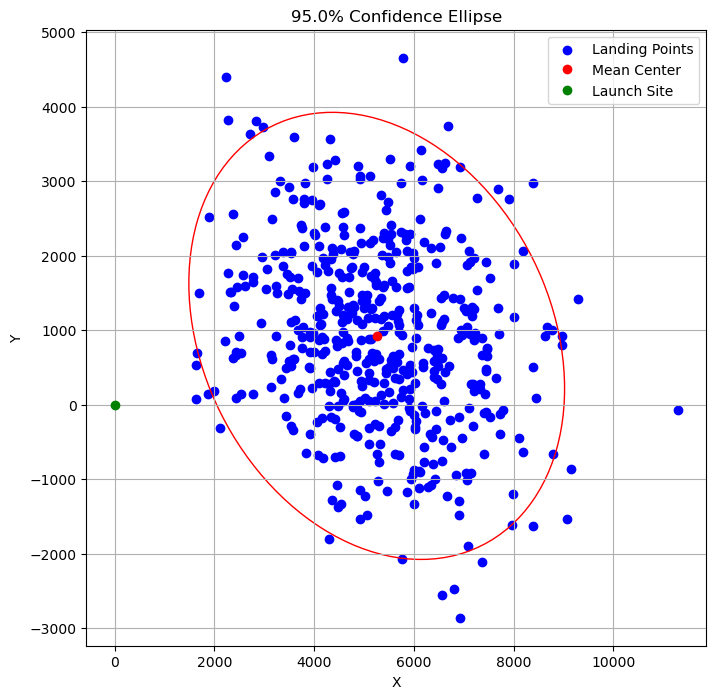

In [156]:
#Confidence Intervals

img = mpimg.imread('FAR_33KM.png')

xLength = 38.24 * 1000  # length of image, in m
yLength = 17.692 * 1000


x = OpenRocketData['posEast']
y = OpenRocketData['posNorth']

launch_x = 0
launch_y = 0

mean_x = np.mean(x)
mean_y = np.mean(y)

cov_matrix = np.cov(x, y)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Set confidence interval
confidence_level = 0.95

chi_square_value = chi2.ppf(confidence_level, 2)

scale_factor = np.sqrt(chi_square_value)

ellipse = Ellipse((mean_x, mean_y), width=2*np.sqrt(eigenvalues[0])*scale_factor,
                  height=2*np.sqrt(eigenvalues[1])*scale_factor,
                  angle=np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])),
                  edgecolor='r', facecolor='none')

a = ellipse.width / 2
b = ellipse.height / 2
theta = np.radians(ellipse.angle)
max_distance = np.sqrt(((a * np.cos(theta))**2 + (b * np.sin(theta))**2) +
                       ((a * np.sin(theta))**2 + (b * np.cos(theta))**2))

plt.figure(figsize=(8, 8))
plt.scatter(x, y, color='blue', label='Landing Points')
plt.plot(mean_x, mean_y, 'ro', label='Mean Center')
plt.plot(launch_x, launch_y, 'go', label='Launch Site')
plt.gca().add_patch(ellipse)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{confidence_level*100}% Confidence Ellipse')
plt.legend()
plt.grid(True)
plt.show()


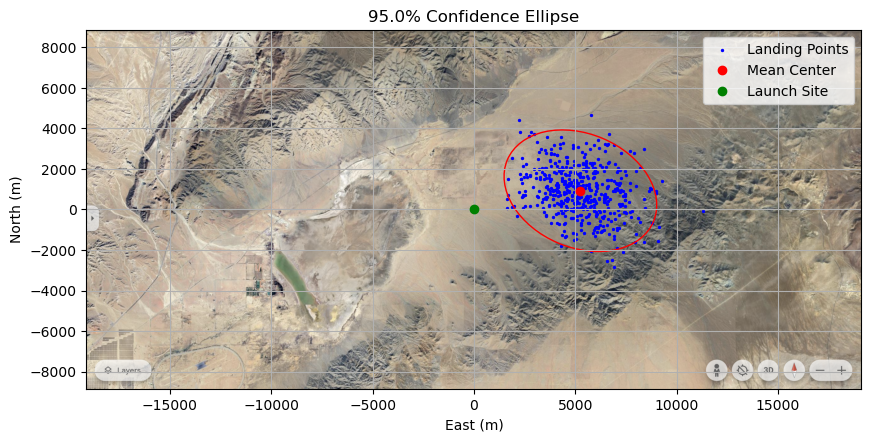

In [157]:
#Confidence Intervals overlaid on map

img = mpimg.imread('FAR_33KM.png')

xLength = 38.24 * 1000  # length of image, in m
yLength = 17.692 * 1000


x = OpenRocketData['posEast'] 
y = OpenRocketData['posNorth']

launch_x = 0
launch_y = 0

mean_x = np.mean(x)
mean_y = np.mean(y)

cov_matrix = np.cov(x, y)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Set confidence interval
confidence_level = 0.95

chi_square_value = chi2.ppf(confidence_level, 2)

scale_factor = np.sqrt(chi_square_value)

ellipse = Ellipse((mean_x, mean_y), width=2*np.sqrt(eigenvalues[0])*scale_factor,
                  height=2*np.sqrt(eigenvalues[1])*scale_factor,
                  angle=np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])),
                  edgecolor='r', facecolor='none')

a = ellipse.width / 2
b = ellipse.height / 2
theta = np.radians(ellipse.angle)
max_distance = np.sqrt(((a * np.cos(theta))**2 + (b * np.sin(theta))**2) +
                       ((a * np.sin(theta))**2 + (b * np.cos(theta))**2))

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, extent=(-xLength/2, xLength/2, -yLength/2, yLength/2))
ax.scatter(x, y, s = 2, color='blue', label='Landing Points')
ax.plot(mean_x, mean_y, 'ro', label='Mean Center')
ax.plot(launch_x, launch_y, 'go', label='Launch Site')
ax.add_patch(ellipse)
ax.set_xlabel('East (m)')
ax.set_ylabel('North (m)')
ax.set_title(f'{confidence_level*100}% Confidence Ellipse')
ax.legend()
ax.grid(True)
plt.show()

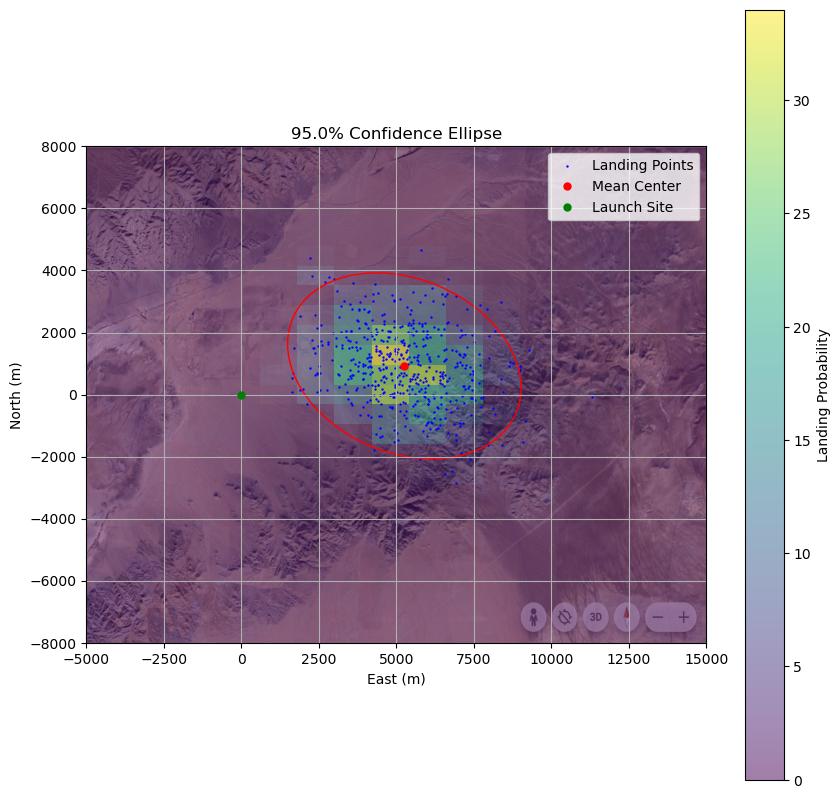

In [158]:
img = mpimg.imread('FAR_33KM.png')
xLength = 38.24 * 1000  # length of image, in m
yLength = 17.692 * 1000  # width of image, in m

x = OpenRocketData['posEast']
y = OpenRocketData['posNorth']

launch_x = 0
launch_y = 0

mean_x = np.mean(x)
mean_y = np.mean(y)

cov_matrix = np.cov(x, y)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Set confidence interval
confidence_level = 0.95
chi_square_value = chi2.ppf(confidence_level, 2)
scale_factor = np.sqrt(chi_square_value)

ellipse = Ellipse((mean_x, mean_y), width=2*np.sqrt(eigenvalues[0])*scale_factor,
                  height=2*np.sqrt(eigenvalues[1])*scale_factor,
                  angle=np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])),
                  edgecolor='r', facecolor='none')

a = ellipse.width / 2
b = ellipse.height / 2
theta = np.radians(ellipse.angle)
max_distance = np.sqrt(((a * np.cos(theta))**2 + (b * np.sin(theta))**2) +
                       ((a * np.sin(theta))**2 + (b * np.cos(theta))**2))

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, extent=[-15000, 15000, -8000, 8000]) #adjust the extent parameter depending on the range of the points

nbins = 25  # Number of bins in each dimension. Modify to adjust size of squares. 
heatmap = ax.hist2d(x, y, bins=nbins, cmap='viridis', alpha=0.5, range=[[-15000, 15000], [-8000, 8000]])
plt.colorbar(heatmap[3], ax=ax, label='Landing Probability')

ax.scatter(x, y, s=0.5, color='blue', label='Landing Points')
ax.plot(mean_x, mean_y, 'ro', markersize=5, label='Mean Center')
ax.plot(launch_x, launch_y, 'go', markersize=5, label='Launch Site')
ax.add_patch(ellipse)
ax.set_xlabel('East (m)')
ax.set_ylabel('North (m)')
ax.set_xlim(-5000, 15000) # adjust accordingly
ax.set_ylim(-8000, 8000) # adjust accordingly 
ax.set_title(f'{confidence_level*100}% Confidence Ellipse')
ax.legend()
ax.grid(True)
plt.show()

In [159]:
#Confidence interval Analysis

img = mpimg.imread('FAR_33KM.png')

x = OpenRocketData['posEast']
y = OpenRocketData['posNorth']

launch_x = 0
launch_y = 0

mean_x = np.mean(x)
mean_y = np.mean(y)

distances_to_launch = np.sqrt((x - launch_x)**2 + (y - launch_y)**2)
distances_to_mean = np.sqrt((x - mean_x)**2 + (y - mean_y)**2)

sample_mean_x = np.mean(x)
sample_mean_y = np.mean(y)
sample_mean_distance_to_launch = np.mean(distances_to_launch)
sample_mean_distance_to_mean = np.mean(distances_to_mean)

n = len(x)  # Sample size
std_error_x = np.std(x, ddof=1) / np.sqrt(n)
std_error_y = np.std(y, ddof=1) / np.sqrt(n)
std_error_distance_to_launch = np.std(distances_to_launch, ddof=1) / np.sqrt(n)
std_error_distance_to_mean = np.std(distances_to_mean, ddof=1) / np.sqrt(n)

#adjust confidence level accordingly
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha/2, n - 1)

ci_x = (sample_mean_x - t_critical * std_error_x, sample_mean_x + t_critical * std_error_x)
ci_y = (sample_mean_y - t_critical * std_error_y, sample_mean_y + t_critical * std_error_y)
ci_distance_to_launch = (sample_mean_distance_to_launch - t_critical * std_error_distance_to_launch,
                         sample_mean_distance_to_launch + t_critical * std_error_distance_to_launch)
ci_distance_to_mean = (sample_mean_distance_to_mean - t_critical * std_error_distance_to_mean,
                       sample_mean_distance_to_mean + t_critical * std_error_distance_to_mean)

print(f"Estimated population mean of x-coordinate: {sample_mean_x:.2f}")
print(f"Confidence interval for x-coordinate: ({ci_x[0]:.2f}, {ci_x[1]:.2f})")
print(f"Estimated population mean of y-coordinate: {sample_mean_y:.2f}")
print(f"Confidence interval for y-coordinate: ({ci_y[0]:.2f}, {ci_y[1]:.2f})")
print(f"Estimated population mean distance to launch site: {sample_mean_distance_to_launch:.2f}")
print(f"Confidence interval for distance to launch site: ({ci_distance_to_launch[0]:.2f}, {ci_distance_to_launch[1]:.2f})")
print(f"Estimated population mean distance to mean landing site: {sample_mean_distance_to_mean:.2f}")
print(f"Confidence interval for distance to mean landing site: ({ci_distance_to_mean[0]:.2f}, {ci_distance_to_mean[1]:.2f})")


Estimated population mean of x-coordinate: 5254.90
Confidence interval for x-coordinate: (5119.70, 5390.09)
Estimated population mean of y-coordinate: 924.06
Confidence interval for y-coordinate: (816.40, 1031.73)
Estimated population mean distance to launch site: 5493.29
Confidence interval for distance to launch site: (5364.24, 5622.34)
Estimated population mean distance to mean landing site: 1734.28
Confidence interval for distance to mean landing site: (1653.02, 1815.53)


     num (ignore)  Avg windspeed  windSpeed   Direction  windTurbulence  \
0               0       5.185664          0  210.051500               0   
1               1       1.672269          0  108.437493               0   
2               2       2.511122          0  236.058782               0   
3               3       2.369312          0  235.515567               0   
4               4       4.397264          0  239.418266               0   
..            ...            ...        ...         ...             ...   
495           495       5.050087          0  193.883099               0   
496           496       1.659378          0   20.528699               0   
497           497       1.420158          0  257.177077               0   
498           498       5.135756          0  202.292154               0   
499           499       5.057256          0  221.968410               0   

     deploymentTime  Unnamed: 6     simTime      posEast     posNorth  \
0         72.223956       

/var/folders/gl/09jc9_ws3n32w206sfy45nxm0000gn/T/ipykernel_50726/557093304.py:24: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  significant_points.plot(ax=ax, marker='o', color='black', markersize=50, alpha=0.5)


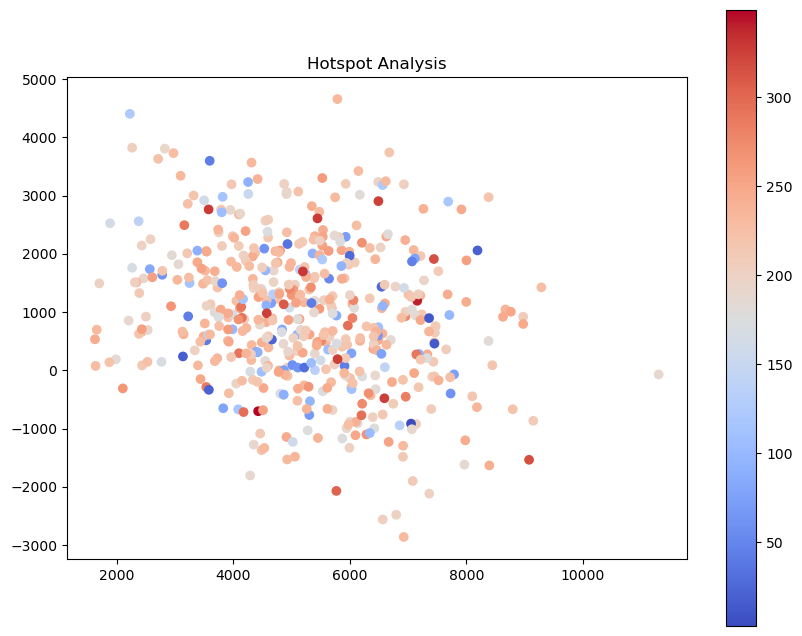

In [146]:
#Geospatial HotSpot Analysis. Currently is not the most useful for analysis when set to the direction column

geometry = gpd.points_from_xy(OpenRocketData['posEast'], OpenRocketData['posNorth'])
data = gpd.GeoDataFrame(OpenRocketData, geometry=geometry)

#Select which column from OpenRocketData to conduct analysis
statVar = 'Direction'

knn = ps.weights.KNN.from_dataframe(data, k=5)
print(data)

gi_star = esda.G_Local(data[statVar], knn, permutations=999)

z_scores = gi_star.Zs
p_values = gi_star.p_sim

data['z_scores'] = z_scores
data['p_values'] = p_values

fig, ax = plt.subplots(figsize=(10, 8))
data.plot(ax=ax, column=statVar, cmap='coolwarm', legend=True)
significant_points = data[(data['z_scores'] > 1.96) | (data['z_scores'] < -1.96)]
significant_points.plot(ax=ax, marker='o', color='black', markersize=50, alpha=0.5)
plt.title('Hotspot Analysis')
plt.show()